In [1]:
import cv2
import mediapipe as mp
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
import csv
import os
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

In [4]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

# Labelling

In [5]:
with open('testing.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [13]:
with open('last_processed_index.pkl', 'rb') as file:
    my_object = pickle.load(file)
    print(my_object)

FileNotFoundError: [Errno 2] No such file or directory: 'last_processed_index.pkl'

In [6]:
def export_landmark(results, action):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
        keypoints.insert(0,action)
        
        print("Upload Succesfull", action)
        
        with open('testing.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        print("Error:", e)
        pass


In [ ]:
# Load or initialize the last processed video index
last_processed_index_file = 'last_processed_index1.pkl'
if os.path.isfile(last_processed_index_file):
    with open(last_processed_index_file, 'rb') as f:
        last_processed_index = pickle.load(f)
else:
    last_processed_index = 0

for x in range(last_processed_index + 1, 173):
    video_path = r"C:\Users\eddcr\Downloads\Wrong Squat\good morning backlight\squat (3).mp4".format(x)
    
    # Check if the video file exists before processing
    if not os.path.isfile(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    pause = False  # Flag to indicate whether the video is paused

    # initiate holistic model
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        #start_time = time.time()
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break

            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make Detection
            results = pose.process(image)

            # Recolor image to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Add text overlay to show the currently playing video
            cv2.putText(image, f"Video: squat({x})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

            k = cv2.waitKey(1)
            if k == 117:  # press u to capture upwards position
                export_landmark(results, 'up')
            if k == 100:  # press d to capture downwards position
                export_landmark(results, 'down')
            if k == 98:  # press b to capture downwards position
                export_landmark(results, 'bad')
            if k == 103:  # press g to capture good squat position
                export_landmark(results, 'good')    
            if k == 109:  # press m to capture goodmorning position
                export_landmark(results, 'bend')
            if k == 105:  # press i to capture cavein position
                export_landmark(results, 'cavein')
            if k == 111:  # press o to capture caveout position
                export_landmark(results, 'caveout')
            if k == 112:  # press p to toggle pause/play
                pause = not pause
            if k == 27:  # press Esc key to exit
                break

            if not pause:
                display_image = cv2.resize(image, (1280, 720))
                cv2.imshow('Mediapipe Feed', image)
                
        cap.release()
        cv2.destroyAllWindows()
    # Save the last processed index
    with open(last_processed_index_file, 'wb') as f:
        pickle.dump(x, f)
        
    if cv2.waitKey(0) & 0xFF == ord('p'):
            # If 'p' is pressed after a video, pause before proceeding to the next video
            pause = True
            
    exit_choice = input("Press 'q' to quit or any other key to continue to the next video: ")
    if exit_choice.lower() == 'q':
        break

Upload Succesfull up
Upload Succesfull up
Upload Succesfull up
Upload Succesfull up
Upload Succesfull up
Upload Succesfull up
Upload Succesfull up
Upload Succesfull up


In [16]:
import cv2
import mediapipe as mp
import os
import pickle
import time


last_processed_index_file = 'last_processed_index.pkl'

if os.path.isfile(last_processed_index_file):
    with open(last_processed_index_file, 'rb') as f:
        last_processed_index = pickle.load(f)
else:
    last_processed_index = 0

for x in range(last_processed_index + 1, 1):
    video_path = r"C:\Users\eddcr\Downloads\Wrong Squat\squat (1).mp4"

    if not os.path.isfile(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    pause = False
    esc_pressed = False  # Flag to track if Esc key was pressed

    with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        start_time = time.time()
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)

            cv2.putText(image, f"Video: squat({x})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

            # Capture landmarks every 0.5 seconds
            elapsed_time = time.time() - start_time
            if elapsed_time >= 0.2:
                export_landmark(results, 'upbad')
                start_time = time.time()

            cv2.imshow('Mediapipe Feed', image)

            k = cv2.waitKey(1)
            if k == 27:  # press Esc key to exit
                esc_pressed = True

            if not pause:
                display_image = cv2.resize(image, (1280, 720))
                cv2.imshow('Mediapipe Feed', image)

        cap.release()
        cv2.destroyAllWindows()

    # Save the last processed index
    with open(last_processed_index_file, 'wb') as f:
        pickle.dump(x, f)

    if esc_pressed:
        stop_choice = input("Press 'q' to stop or any other key to continue: ")
        if stop_choice.lower() == 'q':
            break


# Training

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')
x = df.drop('class', axis = 1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

#with open('test1.pkl', 'wb') as f:
#    pickle.dump((x_test,y_test), f)

In [14]:
df = pd.read_csv('good-bend-cvin-cvout-nohands-rmv.csv')
x = df.drop('class', axis = 1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

y_test

#with open('test2.pkl', 'wb') as f:
#    pickle.dump((x_test,y_test), f)

4307    cavein
2877      good
2997      good
23        good
1074      good
         ...  
2378      good
1512      good
3833      good
4582    cavein
1056      good
Name: class, Length: 1756, dtype: object

In [12]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'dc': make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'svm': make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, decision_function_shape='ovr')),
    'mlp': make_pipeline(StandardScaler(), MLPClassifier(max_iter=100, random_state=42))
}

In [15]:
pipelines = {
    'rf': make_pipeline(RandomForestClassifier()),
    'dc': make_pipeline(DecisionTreeClassifier()),
    'svm': make_pipeline(SVC(kernel='linear', C=1.0, decision_function_shape='ovr')),
    'mlp': make_pipeline(MLPClassifier(max_iter=100, hidden_layer_sizes=(256, 128),))
}

In [16]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model

C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
fit_models

{'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'dc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(kernel='linear'))]),
 'mlp': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(max_iter=100, random_state=42))])}

In [27]:
fit_models['rf'].predict(x_test)

array(['down', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'down',
       'down', 'down', 'down', 'down', 'up', 'up', 'up', 'up', 'up',
       'down', 'down', 'up', 'up', 'up', 'down', 'up', 'down', 'down',
       'down', 'down', 'up', 'down', 'down', 'up', 'up', 'down', 'up',
       'down', 'down', 'up', 'down', 'down', 'up', 'up', 'up', 'down',
       'down', 'up', 'down', 'up', 'up', 'down', 'up', 'up', 'up', 'down',
       'up', 'up', 'down', 'down', 'down', 'down', 'up', 'up', 'down',
       'down', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'down',
       'up', 'down', 'down', 'up', 'up', 'up', 'down', 'down', 'down',
       'up', 'up', 'up', 'down', 'up', 'down', 'down', 'down', 'up', 'up',
       'down', 'down', 'up', 'up', 'down', 'down', 'up', 'down', 'down',
       'up', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'down',
       'down', 'down', 'up', 'up', 'up', 'down', 'up', 'down', 'down',
       'up', 'up', 'up', 'up', 'down', 'up', 'down', 'down'

# Evaluate

In [45]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model in the fit_models dictionary and perform cross-validation
for algo, model in fit_models.items():
    scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    print(f'{algo} Cross-Validation Scores: {scores}')
    print(f'{algo} Mean Accuracy: {scores.mean()}')
    print()

rf Cross-Validation Scores: [1.         1.         0.98809524 1.         1.         1.
 0.98809524 1.         0.98809524 0.98809524]
rf Mean Accuracy: 0.9952380952380953

dc Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         0.98809524 0.98809524 1.        ]
dc Mean Accuracy: 0.9976190476190476

svm Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         0.98809524 1.         1.        ]
svm Mean Accuracy: 0.9988095238095237



C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multi

mlp Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         0.98809524 1.         1.        ]
mlp Mean Accuracy: 0.9988095238095237



C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [17]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat), 
          precision_score(y_test, yhat, average='weighted', labels=np.unique(yhat)),
          recall_score(y_test, yhat, average='weighted', labels=np.unique(yhat)))

rf 0.9982915717539863 0.9982956074112603 0.9982915717539863
dc 0.9840546697038725 0.9840635611806432 0.9840546697038725
svm 0.9738041002277904 0.9738559557400268 0.9738041002277904
mlp 0.9886104783599089 0.9885649271001012 0.9886104783599089


In [15]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming fit_models is a dictionary containing your models

headers = ["Algorithm", "Accuracy", "Precision (weighted)", "Recall (weighted)"]
table_data = []

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average='weighted', labels=np.unique(yhat))
    recall = recall_score(y_test, yhat, average='weighted', labels=np.unique(yhat))

    table_data.append([algo, accuracy, precision, recall])

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+-----------+--------------------+----------------------+--------------------+
| Algorithm |      Accuracy      | Precision (weighted) | Recall (weighted)  |
+-----------+--------------------+----------------------+--------------------+
|    rf     | 0.9936708860759493 |  0.9937587904360056  | 0.9936708860759493 |
|    dc     | 0.9936708860759493 |  0.9937587904360056  | 0.9936708860759493 |
|    svm    | 0.9968354430379747 |  0.9968535262206148  | 0.9968354430379747 |
|    mlp    |        1.0         |         1.0          |        1.0         |
+-----------+--------------------+----------------------+--------------------+


In [22]:
yhat = fit_models['mlp',9].predict(x_test)

In [18]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# Epoch

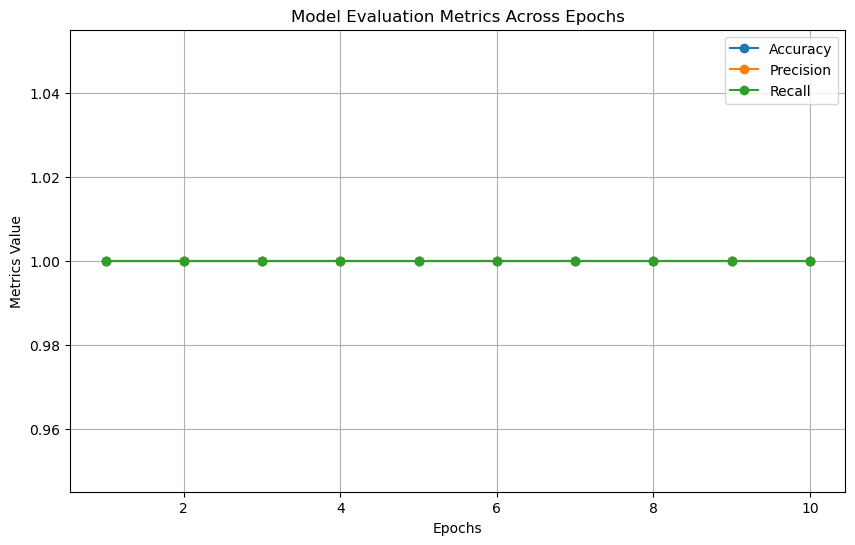

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

epochs = 10  # Set the number of epochs

fit_models = {}
evaluation_metrics = {'accuracy': [], 'precision': [], 'recall': []}

for epoch in range(epochs):
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(x_train, y_train)
        fit_models[(algo, epoch)] = model

    # Evaluate the models after each epoch
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average='weighted', labels=np.unique(yhat))
    recall = recall_score(y_test, yhat, average='weighted', labels=np.unique(yhat))

    evaluation_metrics['accuracy'].append(accuracy)
    evaluation_metrics['precision'].append(precision)
    evaluation_metrics['recall'].append(recall)

# Create a graph
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs_range, evaluation_metrics['accuracy'], label='Accuracy', marker='o')
plt.plot(epochs_range, evaluation_metrics['precision'], label='Precision', marker='o')
plt.plot(epochs_range, evaluation_metrics['recall'], label='Recall', marker='o')

plt.title('Model Evaluation Metrics Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(True)
plt.show()


# Detect Using Model

In [ ]:
with open('coords-cleaned.pkl', 'rb') as f:
    model1 = pickle.load(f)
    
#with open('squattest.pkl', 'rb') as file:
#    my_object = pickle.load(file)
#    print(my_object)

In [ ]:
with open('good-gm-cvin-cvout.pkl', 'rb') as f:
    model2 = pickle.load(f)
    
#with open('squattest.pkl', 'rb') as file:
#    my_object = pickle.load(file)
#    print(my_object)

In [ ]:
 
import pickle

# Load the .pkl file
with open('good-gm-cvin-cvout.pkl', 'rb') as file:
    data = pickle.load(file)

# Assuming the data is a tuple with X_train and y_train
if len(data) == 2:
    X_train, y_train = data
    # Now you can use X_train and y_train as needed
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
else:
    print("Tuple does not contain X_train and y_train.")


In [ ]:
import cv2

for i in range(10):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera index {i} is working.")
        cap.release()
    else:
        print(f"Camera index {i} is not working.")


In [ ]:
import cv2

# Open a connection to the camera (in this case, the default camera, usually the built-in webcam)
cap = cv2.VideoCapture(3)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Get the resolution of the camera
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Camera Resolution: {width} x {height}")

# Release the camera
cap.release()


In [ ]:
cap = cv2.VideoCapture(0)
counter = 0
current_stage = ''

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        

        #Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #Make Detection
        results = pose.process(image)

        #Recolor image to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
       
        #Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class1 = model1.predict(X)[0]
            body_language_prob1 = model1.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            # counter
            if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= .7:
                current_stage = 'up'
            elif current_stage == 'up' and body_language_class1 == 'down' and body_language_prob1[body_language_prob1.argmax()] >= .7:
                current_stage="down"
                counter +=1
                print(current_stage)
            
            #Get status box
            cv2.rectangle (image, (0,0), (250, 60), (245, 117, 16), -1)
            
            #Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display counter
            cv2.putText(image, 'COUNT'
                        , (180,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (175,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
        except Exception as e:
            print("Error")
            pass
        
        #image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        display_image = cv2.resize(image, (640, 480))
        cv2.imshow('Mediapipe Feed', display_image)

        if cv2.waitKey(10) & 0xFF == ord ('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

# Detect Using Video USING THE GOOD ONE

In [23]:
# Load the .pkl file for the first set of data
with open('model1.pkl', 'rb') as f:
    model1 = pickle.load(f)
    

# Load the .pkl file for the second set of data
with open('model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [45]:
# Load the .h5 file for the first set of data
model1 = load_model('up_down_downbad_model.keras')

# Load the .h5 file for the second set of data
model2 = load_model('good-bend-cvin-cvout.keras')

In [24]:
model1

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [50]:
row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
X = pd.DataFrame([row], columns=landmarks[1:])
body_language_class1 = model1.predict(X)[0]
body_language_prob1 = model1.predict_proba(X)[0]
print(body_language_class1, body_language_prob1)

1/1 [==============================] - 0s 35ms/step


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [25]:
#r"C:\Users\eddcr\Downloads\Wrong Squat\cave in backlight\squat (2).mp4"
#r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"
#r"C:\Users\eddcr\Downloads\Fit3D Dataset\squat\squat (2).mp4"
#video_path = r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"
counter = 0
current_stage = ''
cap = cv2.VideoCapture(0)
pause = False  # Flag to indicate whether the video is paused
    
# initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detection
        results = pose.process(image)

        # Recolor image to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        #image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Define class labels for the first model
        #class_labels_model1 = {0: 'up', 1: 'down', 2: 'bad'}

        # Define class labels for the second model
        #class_labels_model2 = {0: 'good', 1: 'bend', 2: 'cavein', 3: 'caveout'}
        
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class1 = model1.predict(X)[0]
            body_language_prob1 = model1.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            body_language_class2 = model2.predict(X)[0]
            body_language_prob2 = model2.predict_proba(X)[0]
            print(body_language_class2, body_language_prob2)
            
            # counter
            if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
            #if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= .7:
                current_stage = 'up'
            elif current_stage == 'up' and body_language_class1 == 'down' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
                current_stage="down"
                counter +=1
                print(current_stage)
            
            #Get status box
            cv2.rectangle (image, (0,0), (480, 60), (245, 117, 16), -1)
            
            
            #cv2.putText(image, 'Class' + body_language_class1.split(' ')[0], (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            #cv2.putText(image, 'Prob' + str(round(body_language_prob1[np.argmax(body_language_prob1)], 2)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            #Display Up or Down
            #cv2.putText(image, 'CLASS'
            #            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            #cv2.putText(image, str(body_language_class1[0]).split(' ')[0]
            #            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            #class_label_model1 = class_labels_model1[np.argmax(body_language_class1)]
            #cv2.putText(image, class_label_model1, (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            #Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display counter
            cv2.putText(image, 'COUNT'
                        , (180,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (175,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #Display Class
            #cv2.putText(image, 'FORM'
            #            , (260,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            #cv2.putText(image, str(body_language_class2[0]).split(' ')[0]
            #            , (265,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #Display Class
            cv2.putText(image, 'FORM'
                        , (260,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class2.split(' ')[0]
                        , (265,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #cv2.putText(image, 'FORM', (260, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            #class_label_model2 = class_labels_model2[np.argmax(body_language_class2)]
            #cv2.putText(image, class_label_model2, (265, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            #display probability
            cv2.putText(image, 'FORM PROB'
                        , (385,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob2[np.argmax(body_language_prob2)],2))
                        , (390,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            
            
        except Exception as e:
            print("Error")
            print("Type of Error:", type(e))
            print("Traceback:", traceback.format_exc())
            pass

        k = cv2.waitKey(1)
        if k == 27:  # press Esc key to exit
            break

        if not pause:
            #display_image = cv2.resize(image, (720, 960))
            cv2.imshow('Mediapipe Feed', image)
        
        
        
    cap.release()
    cv2.destroyAllWindows()

    if cv2.waitKey(0) & 0xFF == ord('p'):
    # If 'p' is pressed after a video, pause before proceeding to the next video
        pause = True

down [0.72 0.17 0.11 0.  ]
good [0.28 0.25 0.09 0.38]
down [0.72 0.17 0.11 0.  ]
good [0.27 0.25 0.09 0.39]
down [0.72 0.17 0.11 0.  ]
good [0.28 0.26 0.08 0.38]
down [0.73 0.16 0.11 0.  ]
good [0.29 0.26 0.08 0.37]
down [0.74 0.16 0.1  0.  ]
good [0.28 0.24 0.08 0.4 ]
down [0.74 0.16 0.1  0.  ]
good [0.29 0.26 0.09 0.36]
down [0.74 0.16 0.1  0.  ]
good [0.28 0.29 0.09 0.34]
down [0.72 0.17 0.11 0.  ]
good [0.28 0.29 0.09 0.34]
down [0.7  0.17 0.13 0.  ]
good [0.29 0.27 0.08 0.36]
down [0.69 0.18 0.13 0.  ]
good [0.26 0.27 0.04 0.43]
down [0.69 0.18 0.13 0.  ]
good [0.24 0.3  0.02 0.44]
down [0.69 0.18 0.13 0.  ]
good [0.23 0.27 0.02 0.48]
down [0.69 0.18 0.13 0.  ]
good [0.22 0.27 0.02 0.49]
down [0.69 0.18 0.13 0.  ]
good [0.22 0.27 0.02 0.49]
down [0.68 0.19 0.13 0.  ]
good [0.21 0.29 0.01 0.49]
down [0.68 0.19 0.13 0.  ]
good [0.21 0.29 0.01 0.49]
down [0.68 0.19 0.13 0.  ]
good [0.21 0.29 0.01 0.49]
down [0.68 0.2  0.12 0.  ]
good [0.21 0.33 0.02 0.44]
down [0.68 0.2  0.12 0.  ]
g

In [5]:
# Load the .pkl file for the first set of data
with open('model1.pkl', 'rb') as f:
    model1 = pickle.load(f)
    

# Load the .pkl file for the second set of data
with open('model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [14]:
#r"C:\Users\eddcr\Downloads\Wrong Squat\cave in backlight\squat (2).mp4"
#r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"
#r"C:\Users\eddcr\Downloads\Fit3D Dataset\squat\squat (2).mp4"
#video_path = r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"

import traceback

counter = 0
current_stage = ''
cap = cv2.VideoCapture(1)
pause = False  # Flag to indicate whether the video is paused

up_accuracy = []
down_accuracy = []   
upbad_accuracy = []
downbad_accuracy = [] 
bend_accuracy = []   
cavein_accuracy = []  
caveout_accuracy = [] 
good_accuracy = []  
    
# initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detection
        results = pose.process(image)

        # Recolor image to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class1 = model1.predict(X)[0]
            body_language_prob1 = model1.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            body_language_class2 = model2.predict(X)[0]
            body_language_prob2 = model2.predict_proba(X)[0]
            print(body_language_class2, body_language_prob2)
            
            # Append confidence values to the lists based on the detected class
            if body_language_class1 == 'up':
                up_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            elif body_language_class1 == 'down':
                down_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            elif body_language_class1 == 'upbad':
                upbad_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            elif body_language_class1 == 'downbad':
                downbad_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            
            
            
            if body_language_class2 == 'bend':
                bend_accuracy.append(body_language_prob2[np.argmax(body_language_prob2)])
            elif body_language_class2 == 'cavein':
                cavein_accuracy.append(body_language_prob2[np.argmax(body_language_prob2)])
            elif body_language_class2 == 'caveout':
                caveout_accuracy.append(body_language_prob2[np.argmax(body_language_prob2)])
            elif body_language_class2 == 'good':
                good_accuracy.append(body_language_prob2[np.argmax(body_language_prob2)])
            
            # counter
            if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
            #if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= .7:
                current_stage = 'up'
            elif current_stage == 'up' and body_language_class1 == 'down' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
                current_stage="down"
                counter +=1
                print(current_stage)
            
            #Get status box
            cv2.rectangle (image, (0,0), (480, 60), (245, 117, 16), -1)

            #Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display counter
            cv2.putText(image, 'COUNT'
                        , (180,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (175,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)

            #Display Class
            cv2.putText(image, 'FORM'
                        , (260,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class2.split(' ')[0]
                        , (265,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)

            #display probability
            cv2.putText(image, 'FORM PROB'
                        , (385,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob2[np.argmax(body_language_prob2)],2))
                        , (390,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            
            
        except Exception as e:
            print("Error")
            print("Type of Error:", type(e))
            print("Traceback:", traceback.format_exc())
            pass
        
        up_accuracy.append(0)
        down_accuracy.append(0)
        upbad_accuracy.append(0)
        downbad_accuracy.append(0)
        bend_accuracy.append(0)
        cavein_accuracy.append(0)
        caveout_accuracy.append(0)
        good_accuracy.append(0)

        k = cv2.waitKey(1)
        if k == 27:  # press Esc key to exit
            break

        if not pause:
            display_image = cv2.resize(image, (1280, 720))
            cv2.imshow('Mediapipe Feed', display_image)
        
        
        
    cap.release()
    cv2.destroyAllWindows()

    if cv2.waitKey(0) & 0xFF == ord('p'):
    # If 'p' is pressed after a video, pause before proceeding to the next video
        pause = True

Error
Type of Error: <class 'AttributeError'>
Traceback: Traceback (most recent call last):
  File "C:\Users\eddcr\AppData\Local\Temp\ipykernel_20568\2553196870.py", line 46, in <module>
    row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
AttributeError: 'NoneType' object has no attribute 'landmark'

Error
Type of Error: <class 'AttributeError'>
Traceback: Traceback (most recent call last):
  File "C:\Users\eddcr\AppData\Local\Temp\ipykernel_20568\2553196870.py", line 46, in <module>
    row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
AttributeError: 'NoneType' object has no attribute 'landmark'

Error
Type of Error: <class 'AttributeError'>
Traceback: Traceback (most recent call last):
  File "C:\Users\eddcr\AppData\Local\Temp\ipykernel_20568\2553196870.py", line 46, in <module>
    row = np.array([[res.x, res.y, res.z, res.visibility] for res in 

In [15]:
filtered_up_values = [up_accuracy[i] for i in range(len(up_accuracy)) if i == len(up_accuracy) - 1 or up_accuracy[i] != 0 or up_accuracy[i - 1] == 0]
filtered_down_values = [down_accuracy[i] for i in range(len(down_accuracy)) if i == len(down_accuracy) - 1 or down_accuracy[i] != 0 or down_accuracy[i - 1] == 0]
filtered_bend_values = [bend_accuracy[i] for i in range(len(bend_accuracy)) if i == len(bend_accuracy) - 1 or bend_accuracy[i] != 0 or bend_accuracy[i - 1] == 0]
filtered_cavein_values = [cavein_accuracy[i] for i in range(len(cavein_accuracy)) if i == len(cavein_accuracy) - 1 or cavein_accuracy[i] != 0 or cavein_accuracy[i - 1] == 0]
filtered_caveout_values = [caveout_accuracy[i] for i in range(len(caveout_accuracy)) if i == len(caveout_accuracy) - 1 or caveout_accuracy[i] != 0 or caveout_accuracy[i - 1] == 0]
filtered_good_values = [good_accuracy[i] for i in range(len(good_accuracy)) if i == len(good_accuracy) - 1 or good_accuracy[i] != 0 or good_accuracy[i - 1] == 0]
filtered_upbad_values = [upbad_accuracy[i] for i in range(len(upbad_accuracy)) if i == len(upbad_accuracy) - 1 or upbad_accuracy[i] != 0 or upbad_accuracy[i - 1] == 0]
filtered_downbad_values = [downbad_accuracy[i] for i in range(len(downbad_accuracy)) if i == len(downbad_accuracy) - 1 or downbad_accuracy[i] != 0 or downbad_accuracy[i - 1] == 0]


In [ ]:
filtered_up_values = 
filtered_down_values = 
filtered_bend_values =
filtered_cavein_values = 
filtered_caveout_values = 
filtered_good_values = 
filtered_upbad_values = 
filtered_downbad_values = 

In [26]:
index_of_nonzero = next((i for i, x in enumerate(filtered_up_values) if x != 0), None)

print("Index where numbers besides 0 start:", index_of_nonzero)

Index where numbers besides 0 start: 389


In [30]:
index_of_last_nonzero = len(filtered_up_values) - next((i for i, x in enumerate(reversed(filtered_up_values)) if x != 0), None) - 1

In [29]:
filtered_up_list = filtered_up_values[index_of_nonzero:389] + filtered_up_values[389:]

In [31]:
filtered_up_list = filtered_up_values[index_of_nonzero:index_of_last_nonzero + 1]

In [32]:
filtered_up_list

[0.75,
 0.71,
 0.79,
 0.79,
 0.66,
 0.64,
 0.76,
 0.7,
 0.78,
 0.81,
 0.8,
 0.81,
 0.84,
 0.82,
 0.81,
 0.8,
 0.82,
 0.81,
 0.82,
 0.82,
 0.83,
 0.84,
 0.84,
 0.84,
 0.84,
 0.49,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.86,
 0.88,
 0.88,
 0.88,
 0.9,
 0.93,
 0.95,
 0.96,
 0.96,
 0.62,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.97,
 0.98,
 0.98,
 0.99,
 0.99,
 0.99,
 1.0,
 1.0,
 0.7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99,
 0.98,
 0.92,
 0.88,
 0.83,
 0.79,
 0,
 0.73,
 0,
 0,
 0,
 0,
 0,
 0.71,
 0,
 0,
 0,
 0,
 0,
 0,
 0.82]

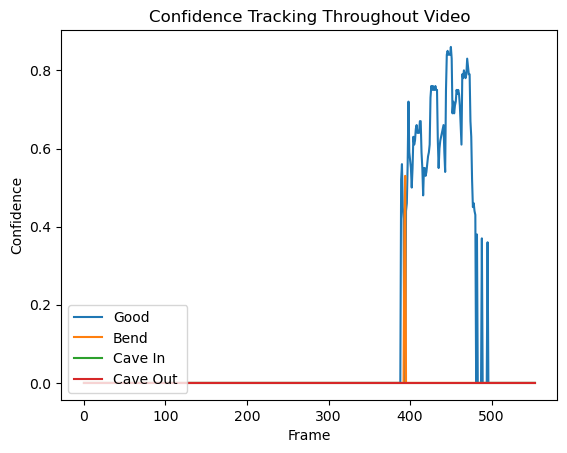

In [16]:
plt.plot(filtered_good_values, label='Good',fillstyle='none', linestyle='solid')
plt.plot(filtered_bend_values, label='Bend',fillstyle='none', linestyle='solid')
plt.plot(filtered_cavein_values, label='Cave In',fillstyle='none', linestyle='solid')
plt.plot(filtered_caveout_values, label='Cave Out ',fillstyle='none', linestyle='solid')

plt.xlabel('Frame')
plt.ylabel('Confidence')
plt.title('Confidence Tracking Throughout Video')
plt.legend(loc=('lower left'))
plt.show()

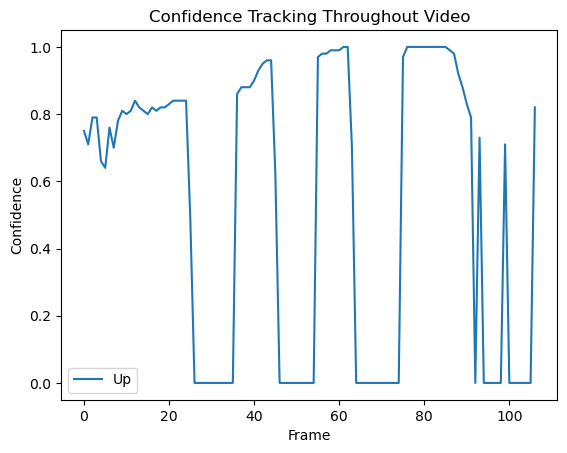

In [33]:
plt.plot(filtered_up_list, label='Up',fillstyle='none', linestyle='solid')
# plt.plot(filtered_down_values, label='Down',fillstyle='none', linestyle='solid')
# plt.plot(filtered_upbad_values, label='Up Bad',fillstyle='none', linestyle='solid')
# plt.plot(filtered_downbad_values, label='Down Bad',fillstyle='none', linestyle='solid')


plt.xlabel('Frame')
plt.ylabel('Confidence')
plt.title('Confidence Tracking Throughout Video')
plt.legend(loc=('lower left'))
plt.show()

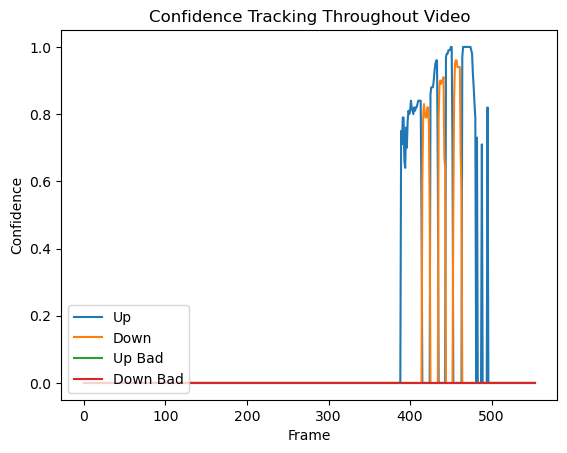

In [17]:
plt.plot(filtered_up_values, label='Up',fillstyle='none', linestyle='solid')
plt.plot(filtered_down_values, label='Down',fillstyle='none', linestyle='solid')
plt.plot(filtered_upbad_values, label='Up Bad',fillstyle='none', linestyle='solid')
plt.plot(filtered_downbad_values, label='Down Bad',fillstyle='none', linestyle='solid')


plt.xlabel('Frame')
plt.ylabel('Confidence')
plt.title('Confidence Tracking Throughout Video')
plt.legend(loc=('lower left'))
plt.show()

In [ ]:
# Load the .pkl file for the first set of data
with open('up-down-dbad-ubad-nohands-rmv.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [ ]:
# Load the .pkl file for the second set of data
with open('good-bend-cvin-cvout-nohands-rmv.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
#r"C:\Users\eddcr\Downloads\Wrong Squat\cave in backlight\squat (2).mp4"
#r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"
#r"C:\Users\eddcr\Downloads\Fit3D Dataset\squat\squat (2).mp4"
#video_path = r"C:\Users\eddcr\Downloads\FYP Dataset\squat (39).mp4"
counter = 0
current_stage = ''
cap = cv2.VideoCapture(0)
pause = False  # Flag to indicate whether the video is paused
up_accuracy = []
down_accuracy = []   
    
    
# initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detection
        results = pose.process(image)

        # Recolor image to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        #image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class1 = model1.predict(X)[0]
            body_language_prob1 = model1.predict_proba(X)[0]
            print(body_language_class1, body_language_prob1)
            
            # Append confidence values to the lists based on the detected class
            if body_language_class1 == 'up':
                up_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            elif body_language_class1 == 'down':
                down_accuracy.append(body_language_prob1[np.argmax(body_language_prob1)])
            
            
            # counter
            if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
            #if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= .7:
                current_stage = 'up'
            elif current_stage == 'up' and body_language_class1 == 'down' and body_language_prob1[body_language_prob1.argmax()] >= 0.7:
                current_stage="down"
                counter +=1
                print(current_stage)
            
            #Get status box
            cv2.rectangle (image, (0,0), (480, 60), (245, 117, 16), -1)
            
            #Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class1.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
            
            #display counter
            cv2.putText(image, 'COUNT'
                        , (180,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (175,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
  
        except Exception as e:
            print("Error")
            print("Type of Error:", type(e))
            print("Traceback:", traceback.format_exc())
            pass

        k = cv2.waitKey(1)
        if k == 27:  # press Esc key to exit
            break

        if not pause:
            display_image = cv2.resize(image, (720, 960))
            cv2.imshow('Mediapipe Feed', display_image)
        
        
        
    cap.release()
    cv2.destroyAllWindows()

    if cv2.waitKey(0) & 0xFF == ord('p'):
    # If 'p' is pressed after a video, pause before proceeding to the next video
        pause = True
        


In [16]:
plt.plot(up_accuracy, label='Up Confidence')
plt.plot(down_accuracy, label='Down Confidence')

plt.xlabel('Frame')
plt.ylabel('Confidence')
plt.title('Confidence Tracking Throughout Video')
plt.legend()
plt.show()

NameError: name 'up_accuracy' is not defined

In [15]:
up_accuracy = []

down_accuracy = []
    
upbad_accuracy = []
    
downbad_accuracy = []
    
good_accuracy = []

bend_accuracy = []
    
cavein_accuracy = []
    
caveout_accuracy =  [] 
    

if body_language_class1 == 'up'
    up_accuracy = body_language_prob1
    
if body_language_class1 == 'down'
    down_accuracy = body_language_prob1
    
if body_language_class1 == 'upbad'
    upbad_accuracy = body_language_prob1
    
if body_language_class1 == 'downbad'
    downbad_accuracy = body_language_prob1
    
    
if body_language_class2 == 'good'
    good_accuracy = body_language_prob2
    
if body_language_class2 == 'bend'
    bend_accuracy = body_language_prob2
    
if body_language_class2 == 'cavein'
    cavein_accuracy = body_language_prob2
    
if body_language_class2 == 'caveout'
    caveout_accuracy = body_language_prob2

SyntaxError: invalid syntax (1539009182.py, line 1)

NameError: name 'body_language_prob1' is not defined

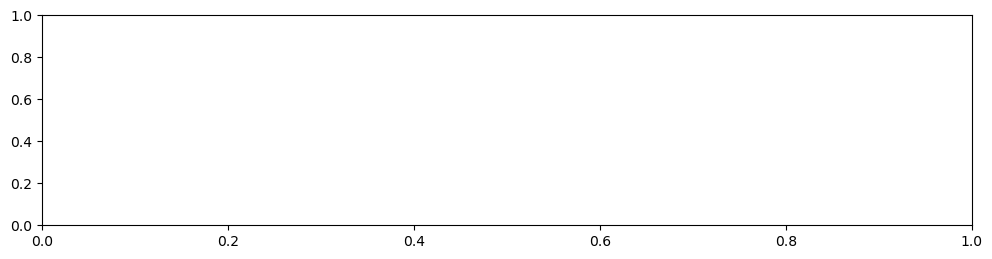

In [14]:
# Plotting body_language_prob1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(body_language_prob1)
plt.title('Body Language Probabilities (Class 1)')
plt.xlabel('Frame')
plt.ylabel('Probability')
plt.grid(True)

# Plotting body_language_prob2
plt.subplot(2, 1, 2)
plt.plot(body_language_prob2)
plt.title('Body Language Probabilities (Class 2)')
plt.xlabel('Frame')
plt.ylabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pickle
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

# Load the .pkl file for the first set of data
with open('test1.pkl', 'rb') as file:
    model1 = pickle.load(file)

# Load the .pkl file for the second set of data
with open('test2.pkl', 'rb') as file:
    model2 = pickle.load(file)

# Assuming the data is a tuple with X_train and y_train for both sets
if len(model1) == 2 and len(model2) == 2:
    X_train1, y_train1 = model1
    X_train2, y_train2 = model2
else:
    print("Tuple does not contain X_train and y_train for both sets.")

# initialize holistic model
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

video_path = r"C:\Users\eddcr\Downloads\FYP Dataset\squat (107).mp4"
counter = 0
current_stage = ''
cap = cv2.VideoCapture(video_path)
pause = False  # Flag to indicate whether the video is paused

body_language_class1_list = []
body_language_class2_list = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Recolor image to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make Detection
    results = pose.process(image)

    # Recolor image to BGR
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Render detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    try:
        row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
        X = pd.DataFrame([row], columns=landmarks[1:])
        body_language_class1 = model1.predict(X)[0]
        body_language_prob1 = model1.predict_proba(X)[0]

        body_language_class2 = model2.predict(X)[0]
        body_language_prob2 = model2.predict_proba(X)[0]

        body_language_class1_list.append(body_language_class1)
        body_language_class2_list.append(body_language_class2)

        # counter
        if body_language_class1 == 'up' and body_language_prob1[body_language_prob1.argmax()] >= .7:
            current_stage = 'up'
        elif current_stage == 'up' and body_language_class1 == 'down' and body_language_prob1[body_language_prob1.argmax()] >= .7:
            current_stage = 'down'
            counter += 1
            print(current_stage)

        # Get status box
        cv2.rectangle(image, (0, 0), (480, 60), (245, 117, 16), -1)

        # Display Up or Down
        cv2.putText(image, 'CLASS'
                    , (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class1.split(' ')[0]
                    , (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display probability
        cv2.putText(image, 'PROB'
                    , (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob1[np.argmax(body_language_prob1)], 2))
                    , (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display counter
        cv2.putText(image, 'COUNT'
                    , (180, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter)
                    , (175, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display Class
        cv2.putText(image, 'FORM'
                    , (260, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class2.split(' ')[0]
                    , (265, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display probability
        cv2.putText(image, 'FORM PROB'
                    , (395, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob2[np.argmax(body_language_prob2)], 2))
                    , (400, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    except Exception as e:
        print("Error")
        pass

    k = cv2.waitKey(1)
    if k == 27:  # press Esc key to exit
        break

    if not pause:
        display_image = cv2.resize(image, (1280, 720))
        cv2.imshow('Mediapipe Feed', image)

cap.release()
cv2.destroyAllWindows()

# Ensure the lengths match before calculating accuracy
if len(y_train1) == len(body_language_class1_list) and len(y_train2) == len(body_language_class2_list):
    accuracy1 = sum(1 for true_class, pred_class in zip(y_train1, body_language_class1_list) if true_class == pred_class) / len(y_train1)
    accuracy2 = sum(1 for true_class, pred_class in zip(y_train2, body_language_class2_list) if true_class == pred_class) / len(y_train2)

    print(f"Length of y_train1: {len(y_train1)}, Length of body_language_class1_list: {len(body_language_class1_list)}")
    print(f"Length of y_train2: {len(y_train2)}, Length of body_language_class2_list: {len(body_language_class2_list)}")

    print(f"Accuracy for body_language_class1: {accuracy1}")
    print(f"Accuracy for body_language_class2: {accuracy2}")

    # Plot the accuracy graph for the first set
    plt.plot(body_language_class1_list, label='body_language_class1')
    plt.xlabel('Frame')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

    # Plot the accuracy graph for the second set
    plt.plot(body_language_class2_list, label='body_language_class2')
    plt.xlabel('Frame')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

else:
    print("Lengths of y_train and predicted class lists do not match.")
